- In this notebook, I am going to make Exploratory Data Analysis (EDA) with the Top Games on Google Playstore dataset.
- This is a dataset of top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs. Data as of Jun 9, 2021.
- Let's start.

- Let's start with importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Now, let's read and check dataset.

In [2]:
df = pd.read_csv("android-games.csv")

In [3]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [4]:
df.shape

(1730, 15)

- We have 15 columns(variables) and 1730 rows(games). What about missing values?

In [5]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

- Not even a one missing value! We will be deprived of the joy of handling missing values!
- Let's check general info of dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


- All looks OK except installs column. Although I would have expect it to be a numerical(int or float), it is object type. I will look into that later.

In [7]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


Before going further, let's summarize what we have got from the dataset.

- Our dataset has games from different categories, different ratings and different number of installs.  
- `installs` variable has a good numerical info to use. It would be a good idea to make adjustments on it to use it as a numerical variable
- There is no missing value, which is very good during the data preparation stage.
- `category` column is categorical variable, it would be good to see whether any significant differences among the categories of the games.
-  Numerical variables deserves special attention for further analysis.
- `paid` and `price` seems to have a lot on common. Needs to look in detail and if necessary to drop one of them for simplicity.

- Let's look into `installs` column.

In [8]:
df["installs"]

0       500.0 M
1       500.0 M
2       100.0 M
3       100.0 M
4       500.0 M
         ...   
1725      1.0 M
1726      1.0 M
1727     10.0 M
1728      5.0 M
1729     10.0 M
Name: installs, Length: 1730, dtype: object

- Let's convert this column into numerical type by defining a function.

In [9]:
def numbers(df):
    if df.split(".")[1].split(" ")[1] == "M":
        return int(df.split(".")[0])
    else:
        return int(df.split(".")[0])/1000
df["installs"] = df.installs.apply(numbers)
df = df.rename(columns={'installs': 'installs_in_million'})

In [10]:
df["installs_in_million"].head()

0    500.0
1    500.0
2    100.0
3    100.0
4    500.0
Name: installs_in_million, dtype: float64

- Great! Now `installs` is a float type column.
- Let's check `price` and `paid` columnn.

In [11]:
df.price.value_counts(normalize=True)

0.00    0.995954
1.99    0.001734
1.49    0.000578
0.99    0.000578
2.99    0.000578
7.49    0.000578
Name: price, dtype: float64

In [12]:
df.paid.value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

- In dataset more than %99 of the games are free.
- There is not enough sample size to make reliable conclusions about price ranges.
- Let's drop `price` column.

In [13]:
df.drop("price", axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average rating       1730 non-null   int64  
 5   growth (30 days)     1730 non-null   float64
 6   growth (60 days)     1730 non-null   float64
 7   category             1730 non-null   object 
 8   5 star ratings       1730 non-null   int64  
 9   4 star ratings       1730 non-null   int64  
 10  3 star ratings       1730 non-null   int64  
 11  2 star ratings       1730 non-null   int64  
 12  1 star ratings       1730 non-null   int64  
 13  paid                 1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 177.5+ KB


Now, let's work on *star ratings* columns.

- Since, there are really big numbers, it is hard to compare them. I will create new colums by normalizing existing columns

In [15]:
df["5 star ratings %"] = round(df["5 star ratings"]  / (df["5 star ratings"] + df["4 star ratings"] + df["3 star ratings"] + df["2 star ratings"] + df["1 star ratings"]) * 100, 2)
df["4 star ratings %"] = round(df["4 star ratings"]  / (df["5 star ratings"] + df["4 star ratings"] + df["3 star ratings"] + df["2 star ratings"] + df["1 star ratings"]) * 100, 2)
df["3 star ratings %"] = round(df["3 star ratings"]  / (df["5 star ratings"] + df["4 star ratings"] + df["3 star ratings"] + df["2 star ratings"] + df["1 star ratings"]) * 100, 2)
df["2 star ratings %"] = round(df["2 star ratings"]  / (df["5 star ratings"] + df["4 star ratings"] + df["3 star ratings"] + df["2 star ratings"] + df["1 star ratings"]) * 100, 2)
df["1 star ratings %"] = round(df["1 star ratings"]  / (df["5 star ratings"] + df["4 star ratings"] + df["3 star ratings"] + df["2 star ratings"] + df["1 star ratings"]) * 100, 2)

In [16]:
df.head(1)

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,5 star ratings %,4 star ratings %,3 star ratings %,2 star ratings %,1 star ratings %
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False,73.66,5.74,3.66,2.46,14.48


Great. Now it is more clear. Feature engineering part is done. Let's move on to analysis part.

- First, let's look into `category` column if category samples are the same. 

## Category

In [17]:
df["category"].value_counts()

GAME CARD            126
GAME WORD            104
GAME CASINO          100
GAME CASUAL          100
GAME ARCADE          100
GAME ADVENTURE       100
GAME RACING          100
GAME SIMULATION      100
GAME BOARD           100
GAME MUSIC           100
GAME ROLE PLAYING    100
GAME EDUCATIONAL     100
GAME SPORTS          100
GAME STRATEGY        100
GAME ACTION          100
GAME TRIVIA          100
GAME PUZZLE          100
Name: category, dtype: int64

- Almost same category samples.
- Let's visualize `category` column.

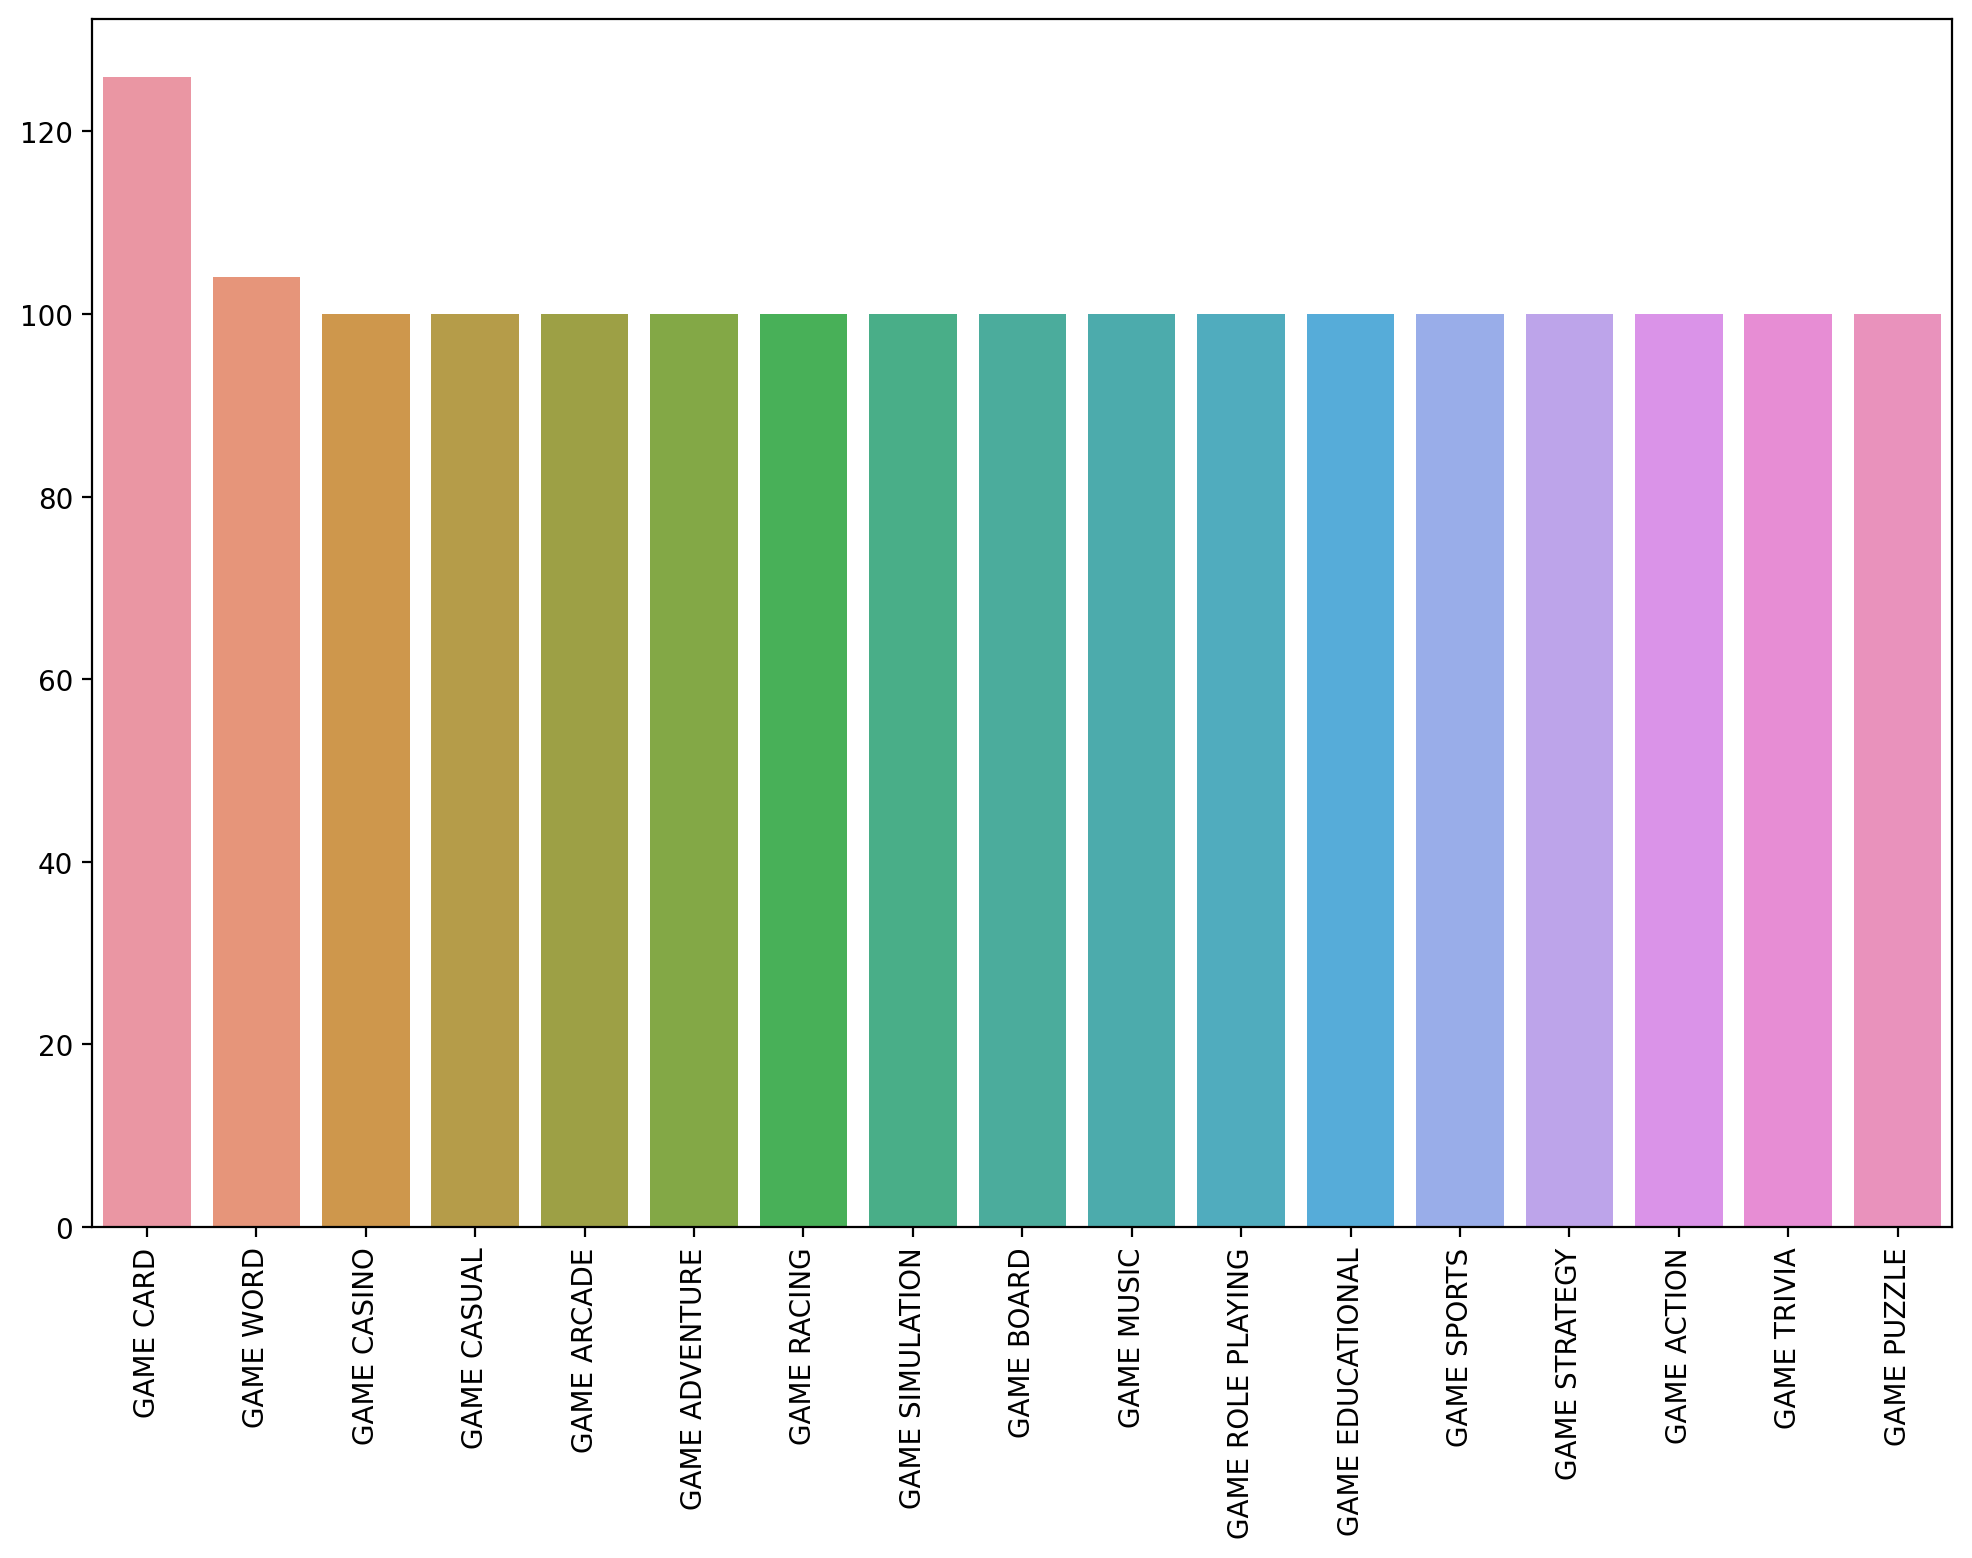

In [18]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=df["category"].value_counts().index, y=df["category"].value_counts().values)
plt.xticks(rotation=90);

## Total Ratings

- It is time to check `total ratings` column.

In [19]:
df["total ratings"].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

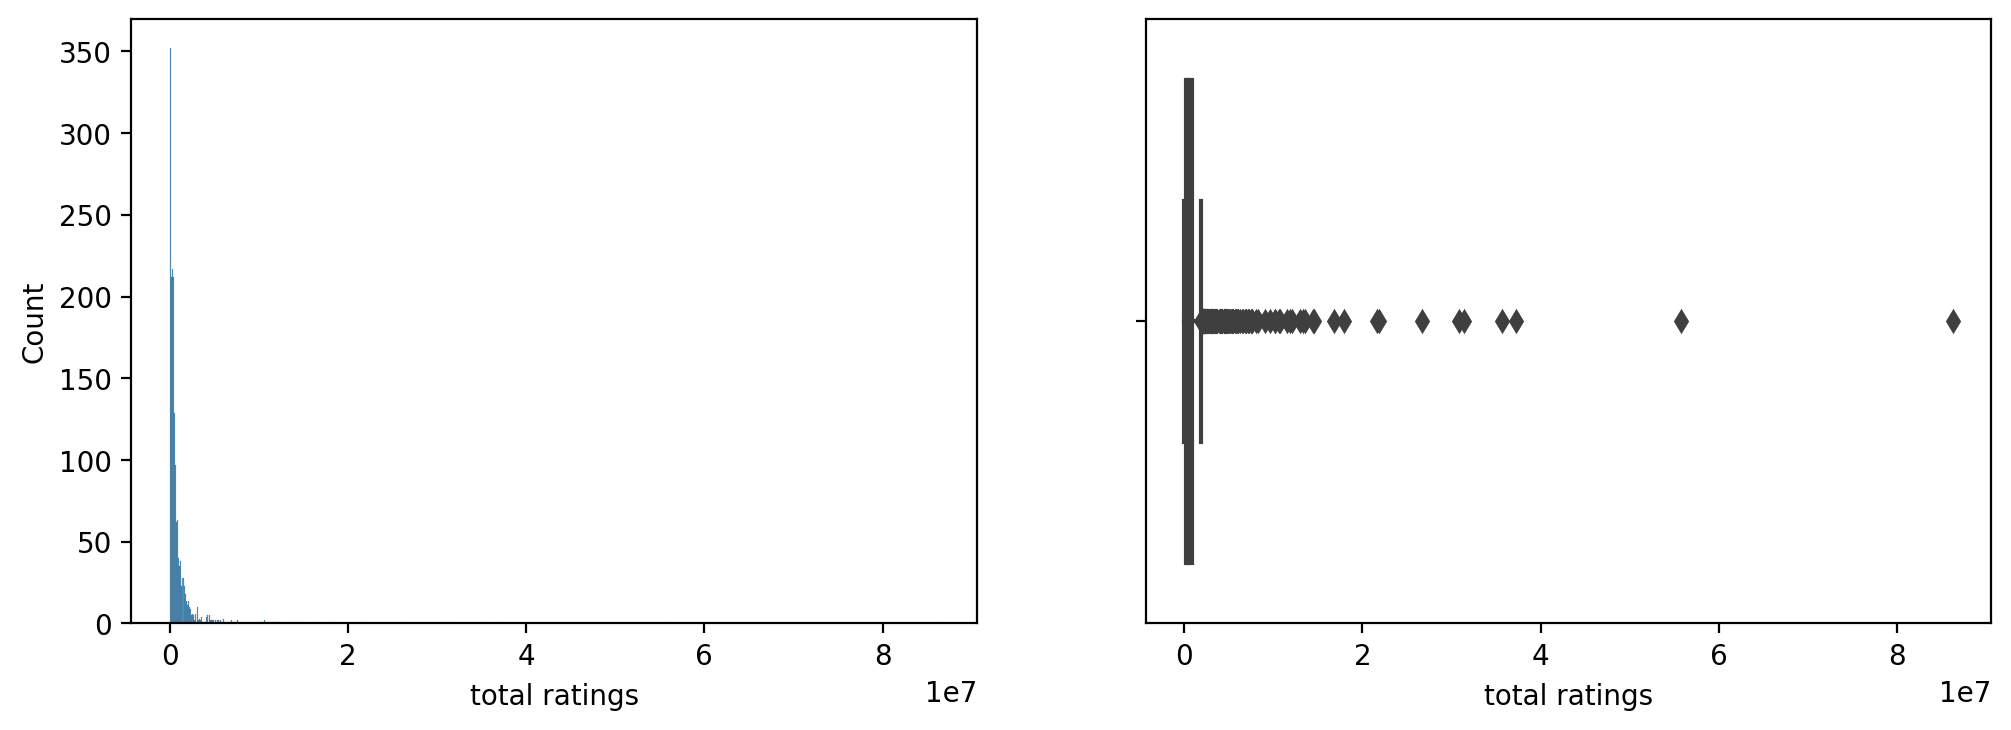

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.histplot(data=df, x="total ratings", ax=ax[0])
sns.boxplot(data=df, x="total ratings");

- Most of the ratings are in the range of 0-500.000.
- The mean is greater than the median.
- We have highly right skewed distribution because of outliers on the maximum side of the distribution.
- Because of outliers, it would be a good idea to look for the median based approach.

## Installs in Million

- What about installs? Let's check `installs_in_million` column.

In [21]:
df["installs_in_million"].describe()

count    1730.000000
mean       29.176185
std        60.287333
min         0.100000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_in_million, dtype: float64

In [22]:
df["installs_in_million"].value_counts().sort_index()

0.1         3
0.5        15
1.0       192
5.0       245
10.0      805
50.0      252
100.0     204
500.0      12
1000.0      2
Name: installs_in_million, dtype: int64

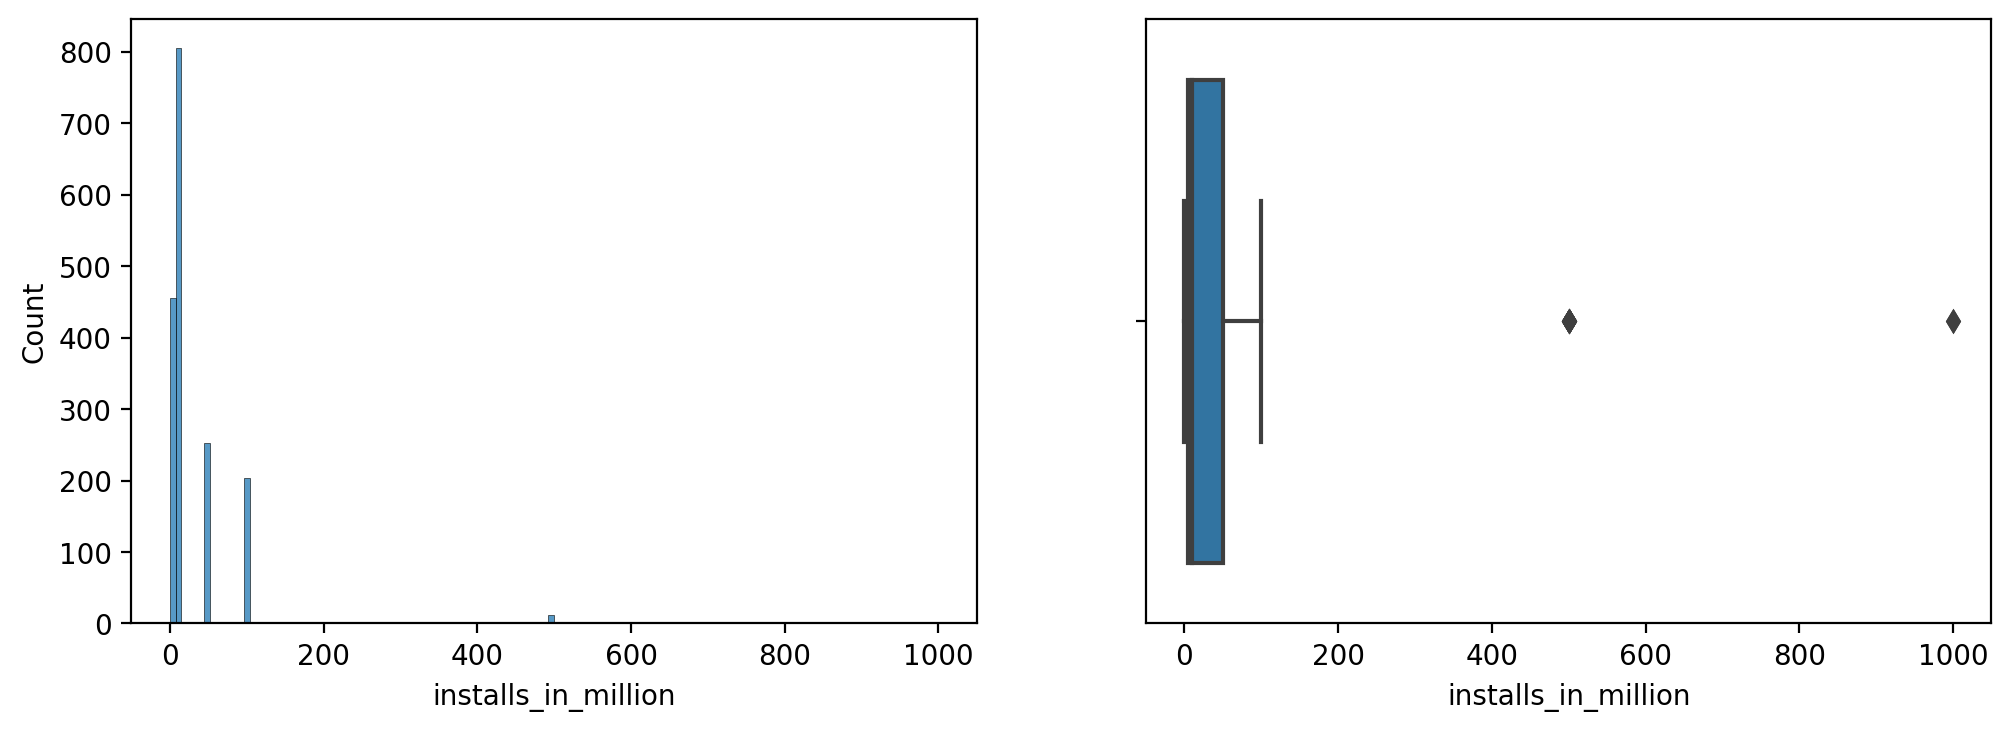

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.histplot(data=df, x="installs_in_million", ax=ax[0])
sns.boxplot(data=df, x="installs_in_million");

- We have rightly skewed distribution.
- Just like `total ratings` column, `installs_in_million` columns also has outliers on the maximum side.
- By looking at just boxplot, you may think that there are only two outliers but that may be wrong. Even though `installs_in_million` column seems like numerical type, it is actually categorical column because there are only 9 possible values in this column. Because of this, in box plot, outliers stacked on each other. You may understand better by looking at value counts of this column. I suspect there are 14 outliers in this column.
- Most of the values are stacked between 1M and 100M.
- Size of the outliers definitely affect  mean value and distributions.
- Difference between mean value and median value is really huge (mean = 29.1M,median= 10M).

## Paid-Free Games






- Even though most of the games, more than %99, is free, let's check differences between paid and free games.

In [24]:
df.groupby("paid").mean()

,rank,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,5 star ratings %,4 star ratings %,3 star ratings %,2 star ratings %,1 star ratings %
paid,,,,,,,,,,,,,,,,
False,50.343006,1.065430e+06,29.286535,3.907719,322.038712,123.042020,762735.621590,116633.305862,57184.519443,27161.041207,101713.349391,70.427226,11.876686,5.838665,2.703831,9.153622
True,61.142857,7.939669e+05,2.014286,4.000000,247.200000,2.671429,638138.571429,68014.285714,27169.000000,12904.714286,47738.142857,78.295714,11.507143,3.737143,1.734286,4.721429


In [25]:
df.paid.value_counts()

False    1723
True        7
Name: paid, dtype: int64

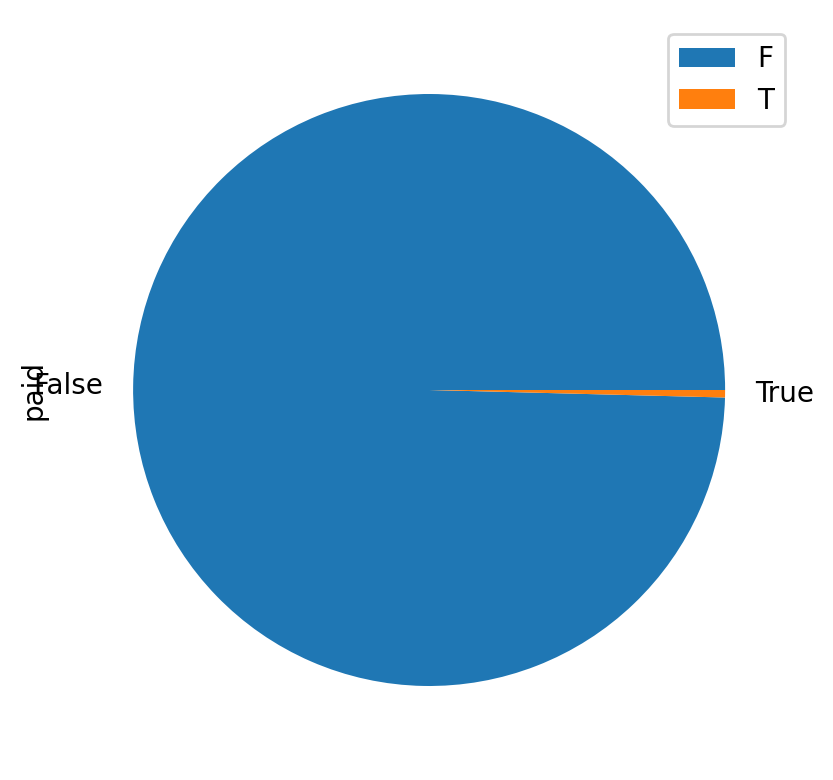

In [46]:
plt.figure(figsize=(8,4), dpi=200)
df.paid.value_counts().plot(kind="pie")
plt.legend("FT")
plt.tight_layout()

## Total Ratings by Category

In [27]:
df.groupby("category").mean()[["total ratings"]].sort_values(by="total ratings", ascending=False)

,total ratings
category,
GAME ACTION,4.011344e+06
GAME CASUAL,2.470866e+06
GAME STRATEGY,1.856570e+06
GAME ARCADE,1.793780e+06
GAME SPORTS,1.353829e+06
GAME RACING,1.139027e+06
GAME PUZZLE,9.466929e+05
GAME SIMULATION,9.341417e+05
GAME ADVENTURE,8.935617e+05


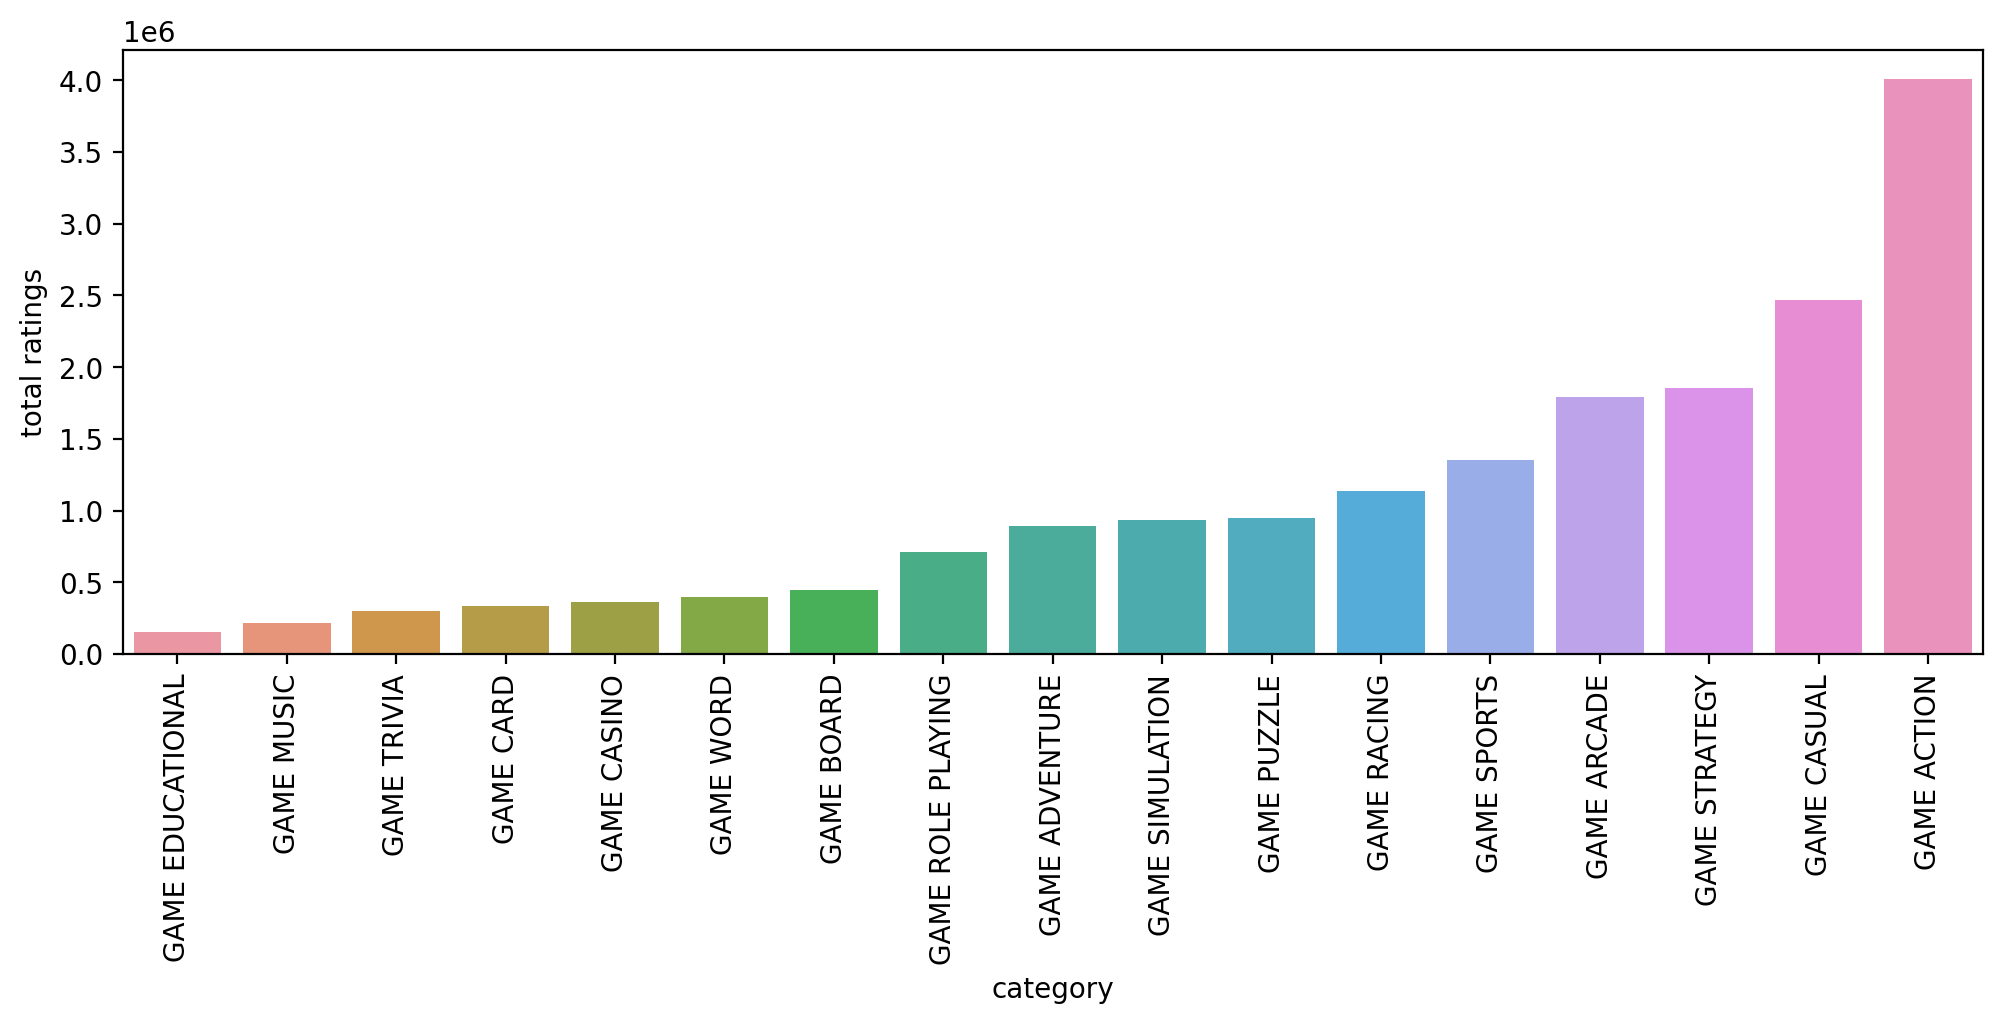

In [28]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x=df.groupby("category").mean().sort_values(by="total ratings").index, y=df.groupby("category").mean().sort_values(by="total ratings")["total ratings"])
plt.xticks(rotation=90);

- Games in the action, casual, strategy,arcade, sports categories are getting considerably more ratings than, games in the educational, music categories.

In [29]:
installs = df.groupby("category")["installs_in_million"].mean().sort_values()

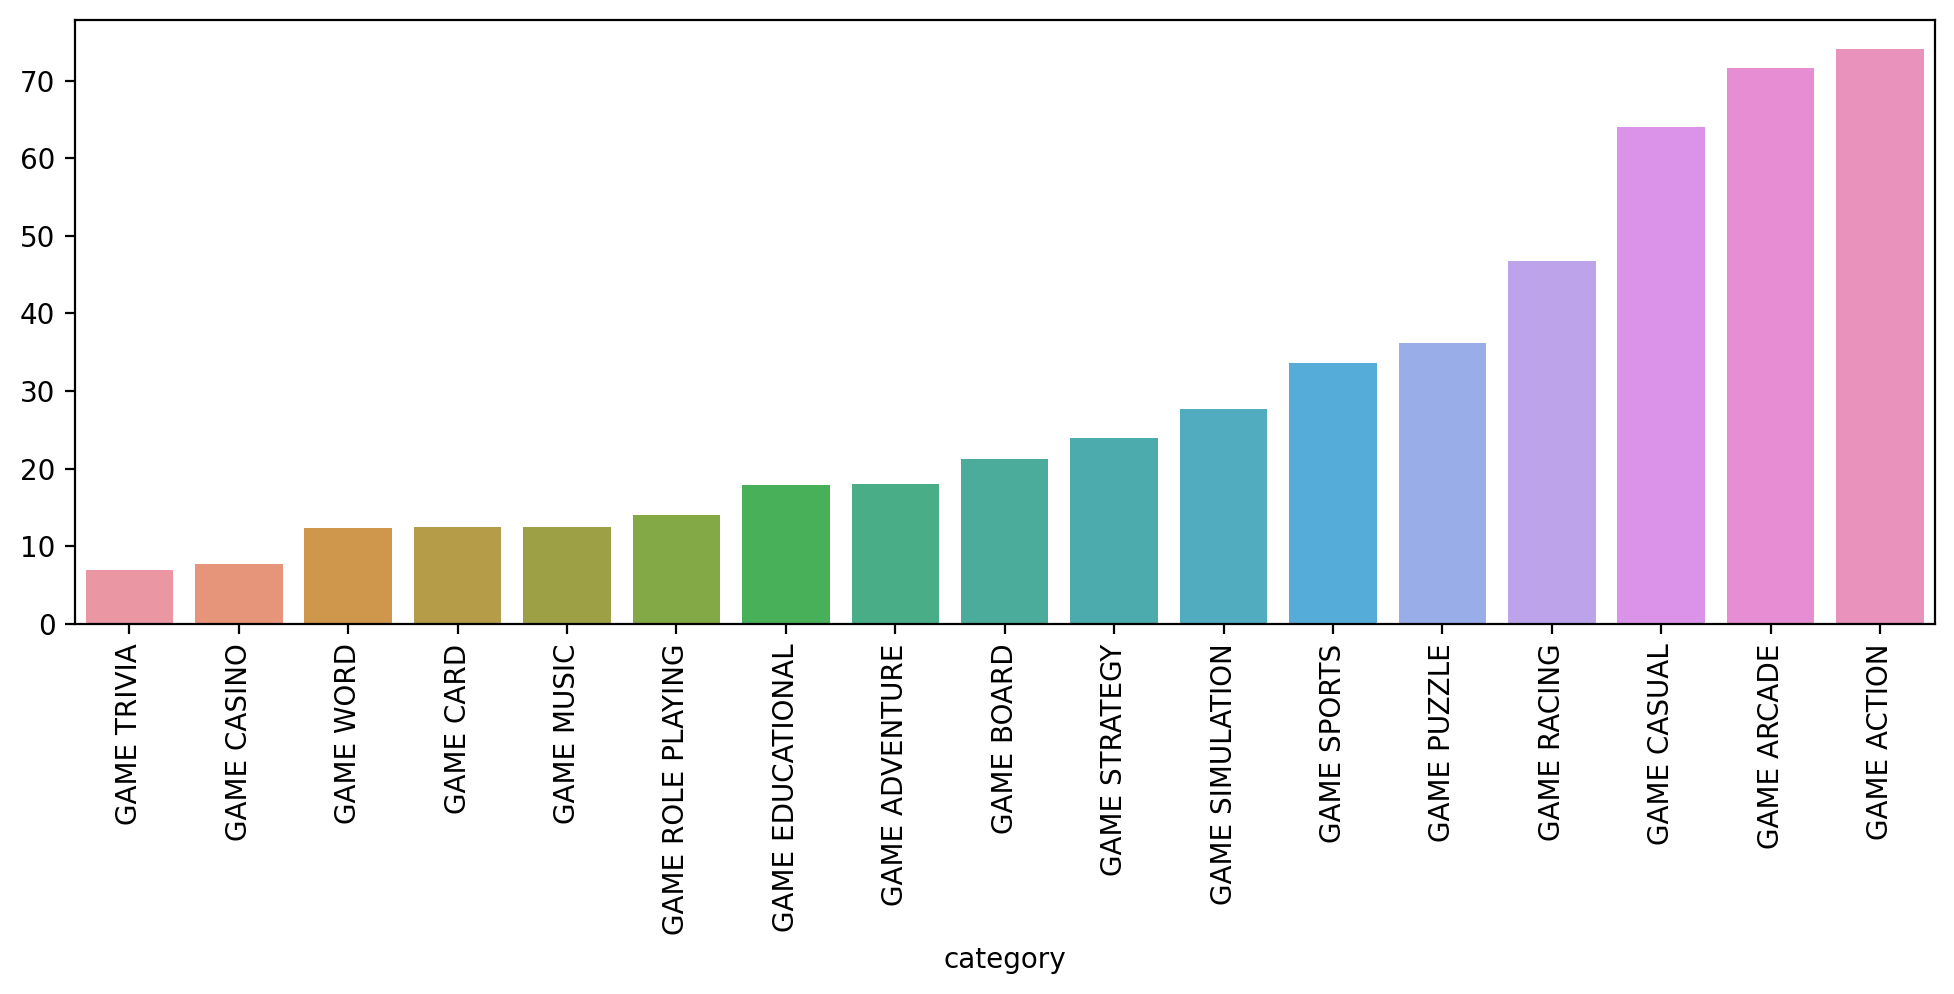

In [30]:
plt.figure(figsize=(12,4), dpi=200,)
sns.barplot(x=installs.index, y=installs.values)
plt.xticks(rotation=90);

- Games in the action, arcade and casual categories are installed significantly more than games in the trivia, casino and word categories.

## Growth by Category

In [31]:
df.head()

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,5 star ratings %,4 star ratings %,3 star ratings %,2 star ratings %,1 star ratings %
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False,73.66,5.74,3.66,2.46,14.48
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False,76.03,5.81,3.36,2.17,12.63
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,1812094,1050600,713912,4308998,False,70.43,6.80,3.94,2.68,16.16
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,1552950,774012,406184,2219794,False,72.44,8.64,4.31,2.26,12.35
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,2124154,1047741,380670,1084340,False,67.94,14.69,7.24,2.63,7.50


In [32]:
gr_30 = df.groupby("category")["growth (30 days)"].mean().sort_values().sort_index()
gr_60 = df.groupby("category")["growth (60 days)"].mean().sort_values().sort_index()

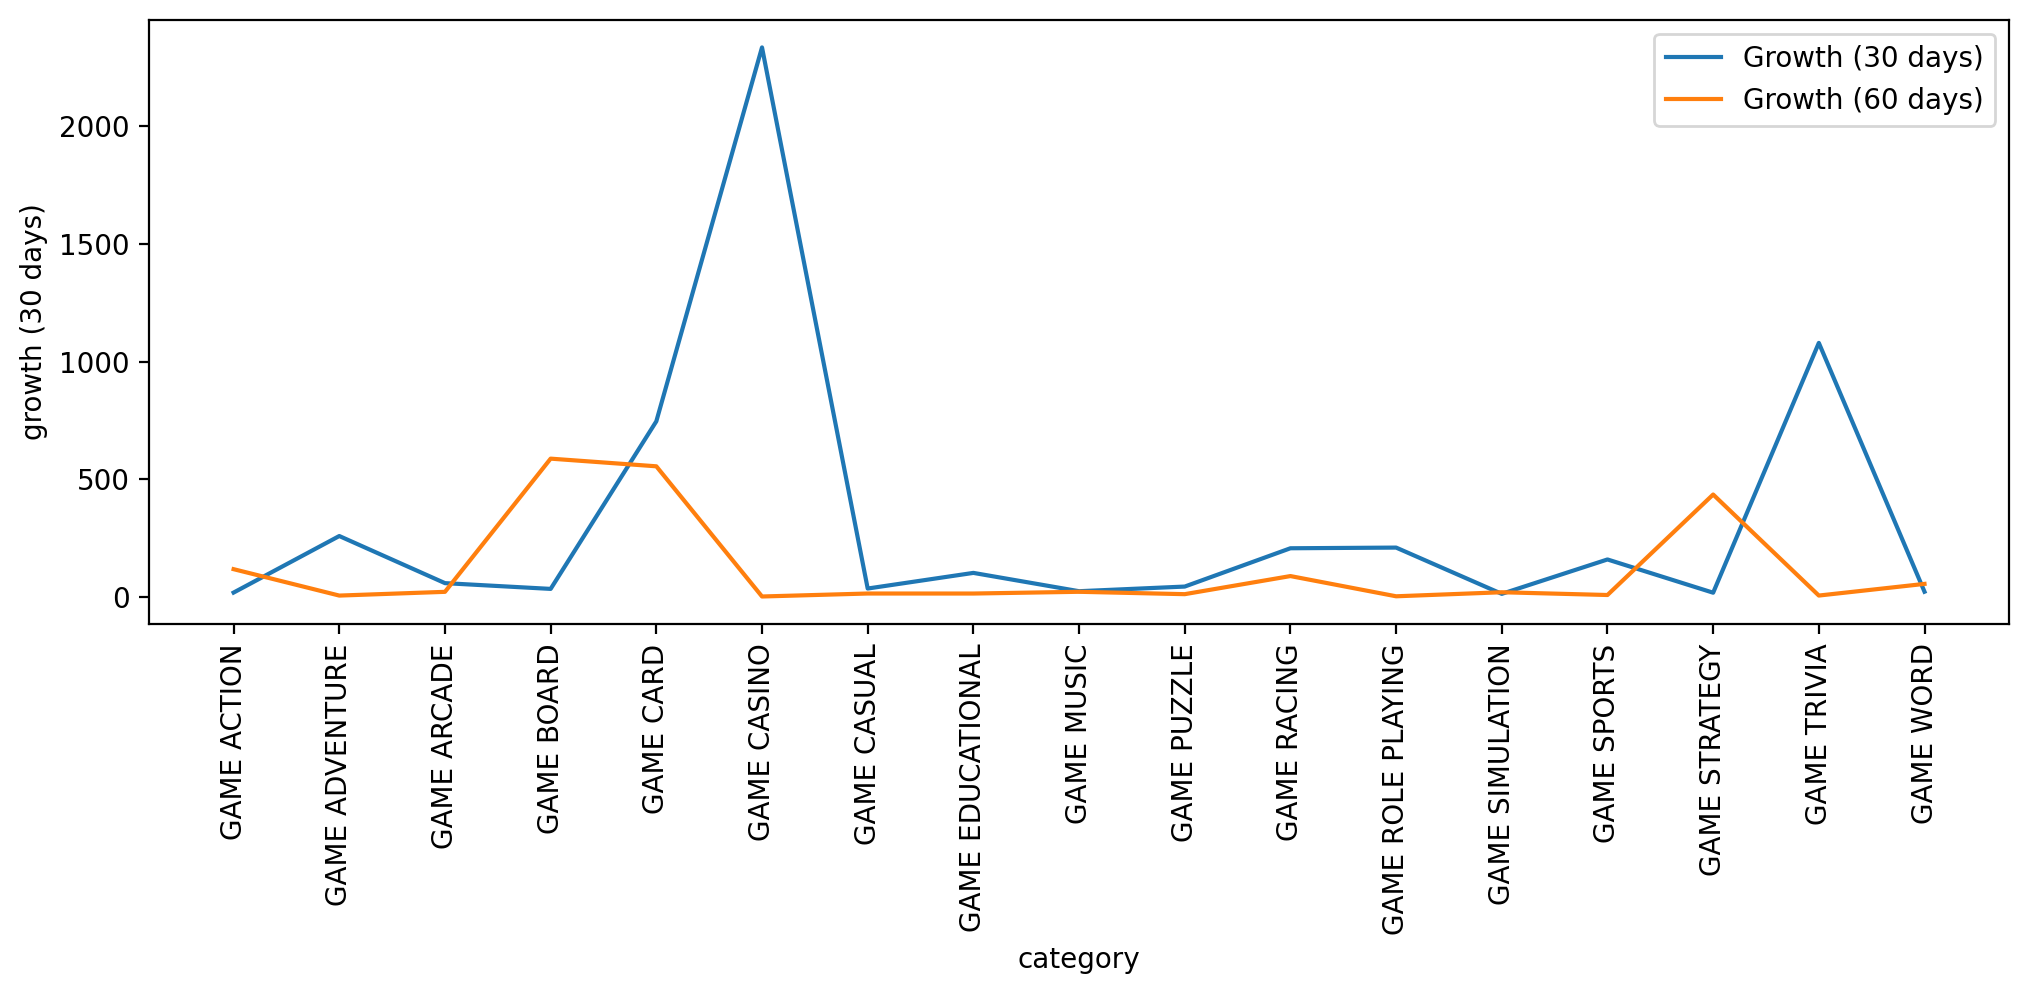

In [33]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(data=gr_30, label="Growth (30 days)")
sns.lineplot(data=gr_60, label="Growth (60 days)")
plt.legend()
plt.xticks(rotation=90);

- Even though games in the action categories get more ratings and were installed more than games in the other categories, games in the casino category have more growth in 30 days. 
- Growth in 60 days for the games in the casino, adventure, role playing categories are significantly lower than their growth in 30 days. 
- With given dataset, we can only speculate something, but we can not make an analytical assumptions based on the  given data. We need more variables to explain the signifcant differences for some of the categories in 30-60 days growth.

## Star Ratings by Category

In [34]:
star_5 = df.groupby("category")["5 star ratings %"].mean().sort_values().sort_index()
star_1 = df.groupby("category")["1 star ratings %"].mean().sort_values().sort_index()
names = [star_1,star_5]

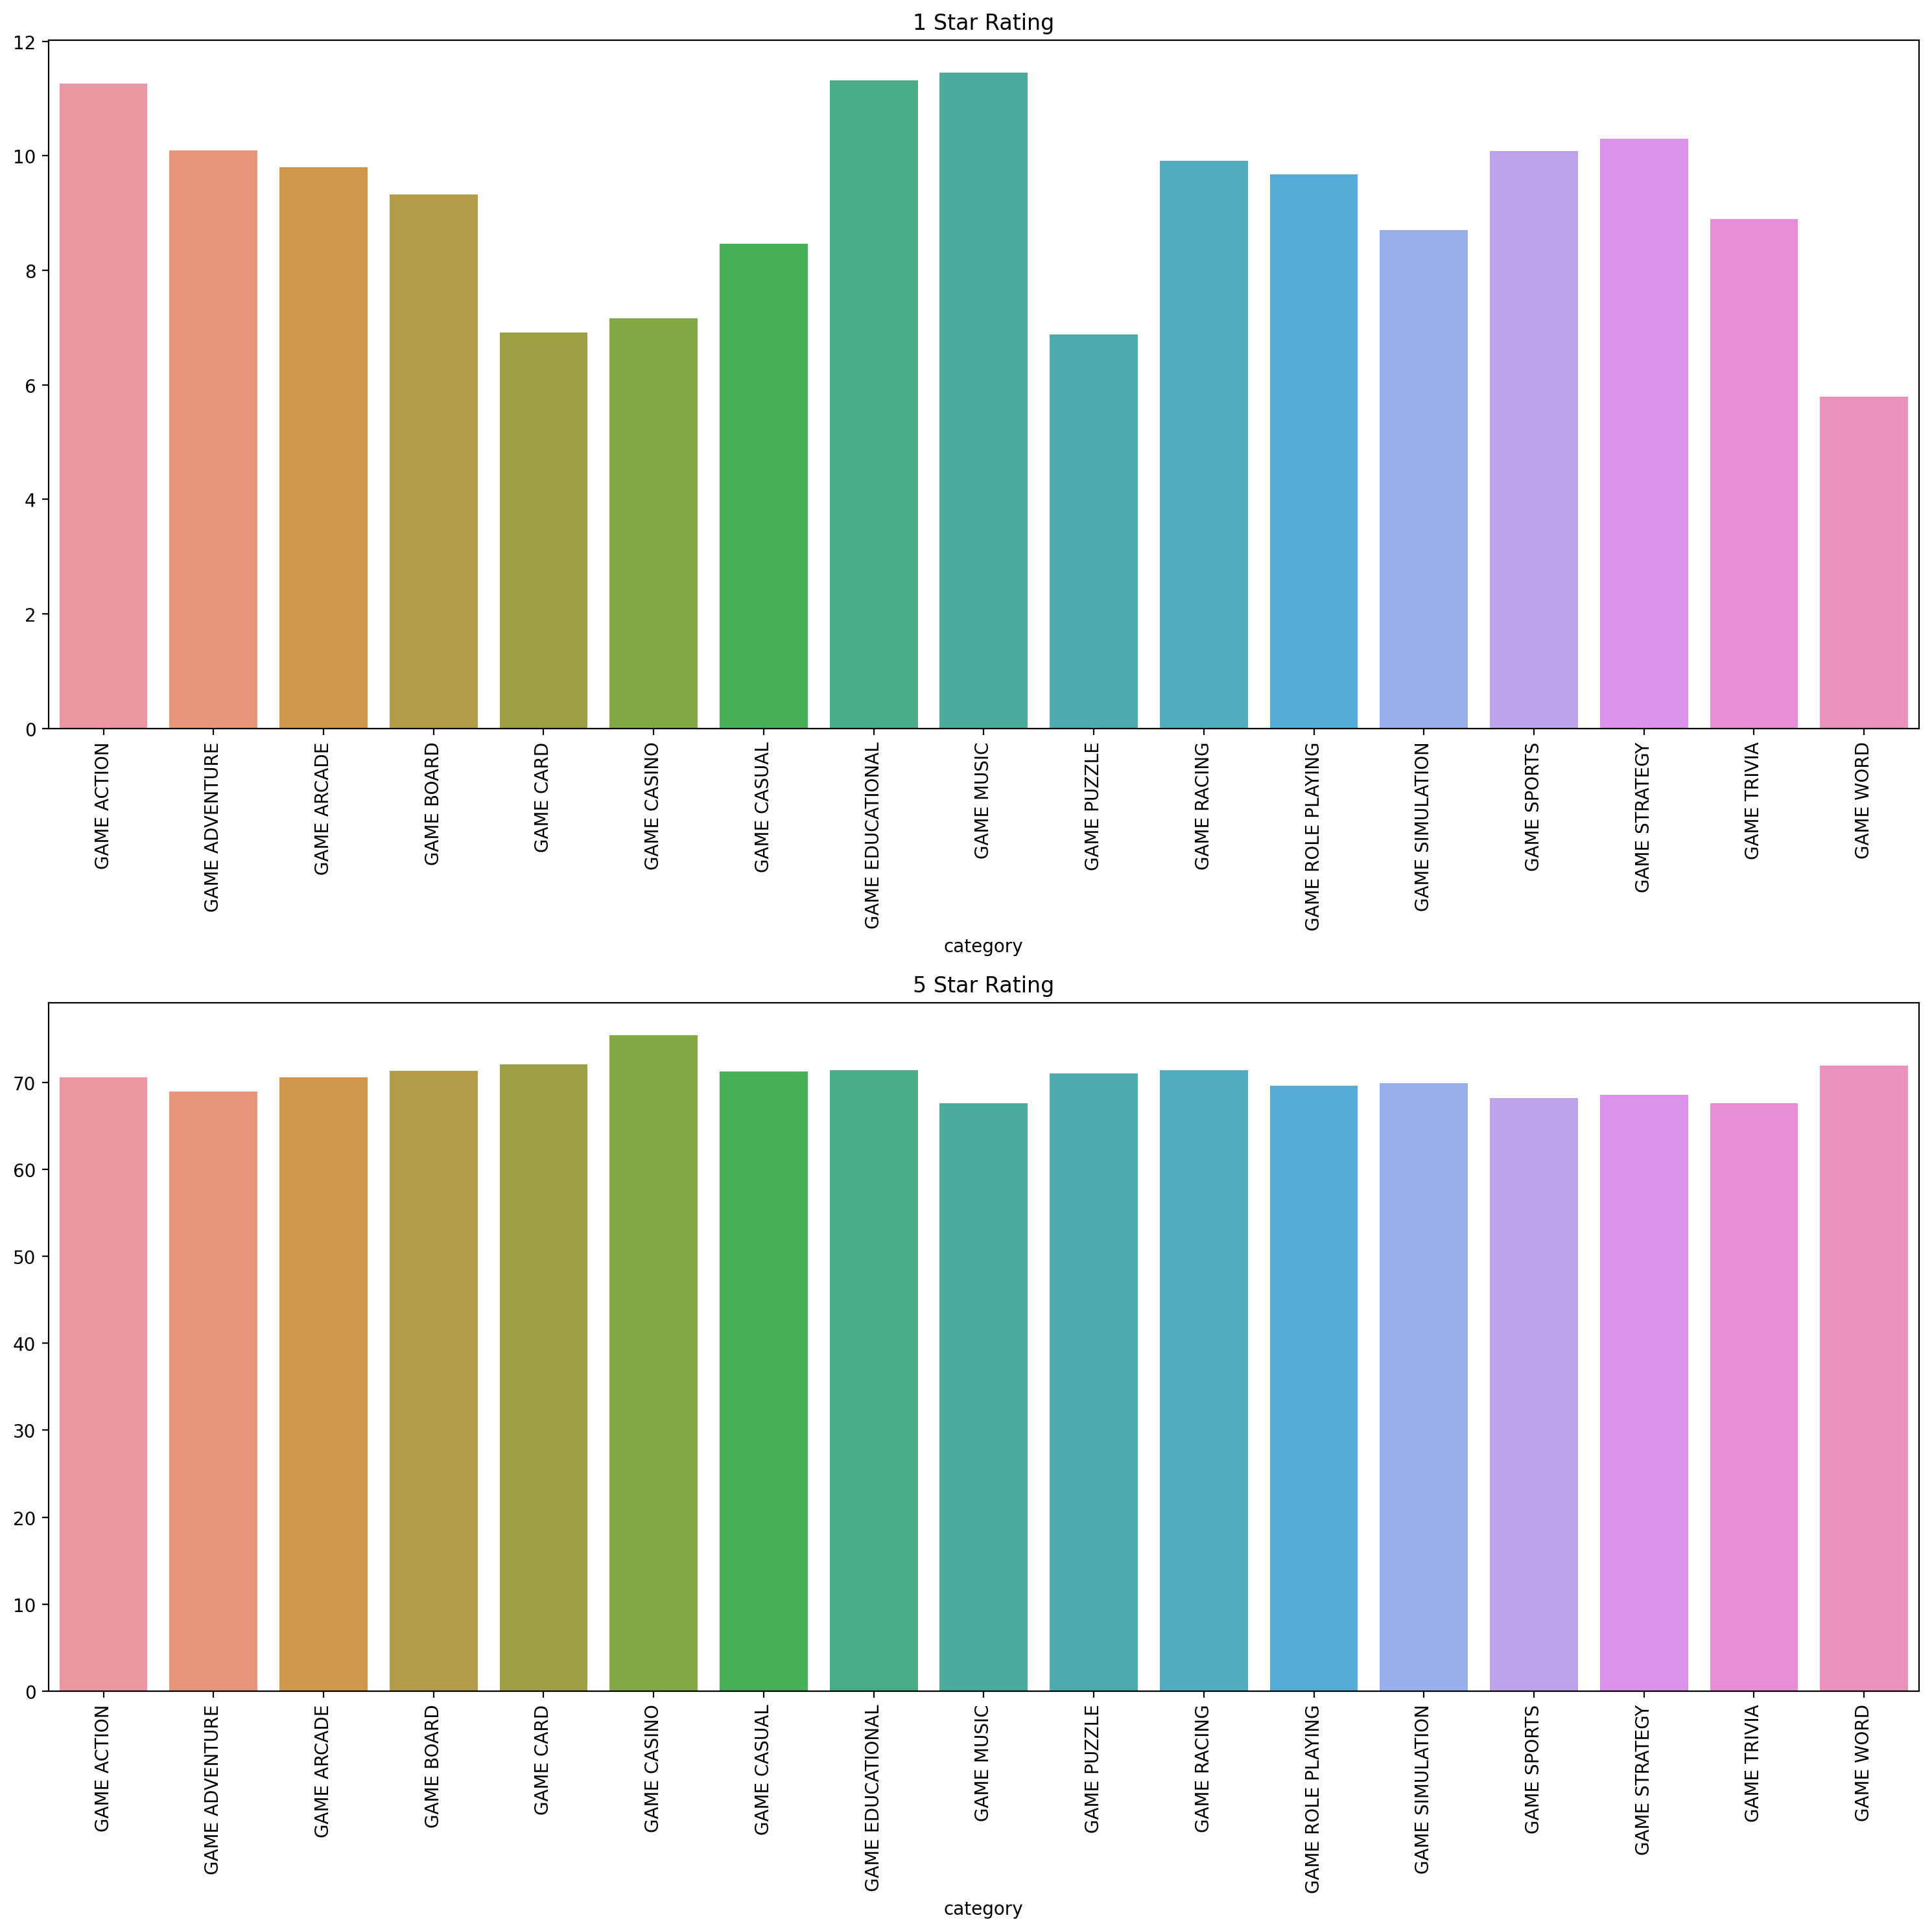

In [35]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 15), dpi=200)
j = 1
for i, feature in enumerate(list(names), 1):
    plt.subplot(len(list(names)), 1, i)
    sns.barplot(x=feature.index, y=feature.values)
    plt.xticks(rotation=90)
    plt.title(f"{j} Star Rating")
    j += 4
plt.tight_layout()

In [36]:
df.groupby("category")[["1 star ratings %","5 star ratings %"]].mean().sort_values(by="1 star ratings %")

,1 star ratings %,5 star ratings %
category,,
GAME WORD,5.789904,71.888654
GAME PUZZLE,6.885300,71.015200
GAME CARD,6.915317,72.087063
GAME CASINO,7.157200,75.405000
GAME CASUAL,8.469200,71.224600
GAME SIMULATION,8.700000,69.917300
GAME TRIVIA,8.888600,67.625900
GAME BOARD,9.324100,71.329400
GAME ROLE PLAYING,9.675400,69.581900


action, arcade, casual

In [37]:
df.groupby("category")[["1 star ratings %","5 star ratings %"]].mean().sort_values(by="5 star ratings %")

,1 star ratings %,5 star ratings %
category,,
GAME MUSIC,11.448900,67.599400
GAME TRIVIA,8.888600,67.625900
GAME SPORTS,10.078900,68.164100
GAME STRATEGY,10.301700,68.595200
GAME ADVENTURE,10.096800,68.928500
GAME ROLE PLAYING,9.675400,69.581900
GAME SIMULATION,8.700000,69.917300
GAME ACTION,11.259200,70.561600
GAME ARCADE,9.798600,70.608300


- Casino games have the most 5 star ratings as a percentage by %75.4. Also has the fourth least 1 star rating as a percentage.
- Music games has the least 5 star ratings and also have the most 1 star ratings. It doesn't look good for music games.
- Most installed categories, Action, Arcade and Casual, have almost the same 5 star ratings as percentage. Among those, Casual has the least 1 star rating with just %8.46, Arcade is the second least with %9.79 and Action has most 1 star ratings among most installed game categories with %11.25.

## Top 3 Games by Category

In [38]:
top_3 = df[df["rank"]<4][['rank','title','category', 'total ratings', 'installs_in_million', '5 star ratings', "5 star ratings %"]]

In [39]:
top_3

,rank,title,category,total ratings,installs_in_million,5 star ratings,5 star ratings %
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766,73.66
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753,76.03
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988,70.43
100,1,Roblox,GAME ADVENTURE,21820451,100.0,16674013,76.41
101,2,Pokémon GO,GAME ADVENTURE,14541662,100.0,9517488,65.45
102,3,Criminal Case,GAME ADVENTURE,4273420,100.0,3264905,76.40
200,1,Subway Surfers,GAME ARCADE,35665901,1000.0,27138572,76.09
201,2,Hungry Shark Evolution - Offline survival game,GAME ARCADE,7202013,100.0,5220860,72.49
202,3,Geometry Dash Lite,GAME ARCADE,6960814,100.0,4787054,68.77
300,1,Ludo King™,GAME BOARD,7512316,500.0,5291589,70.44


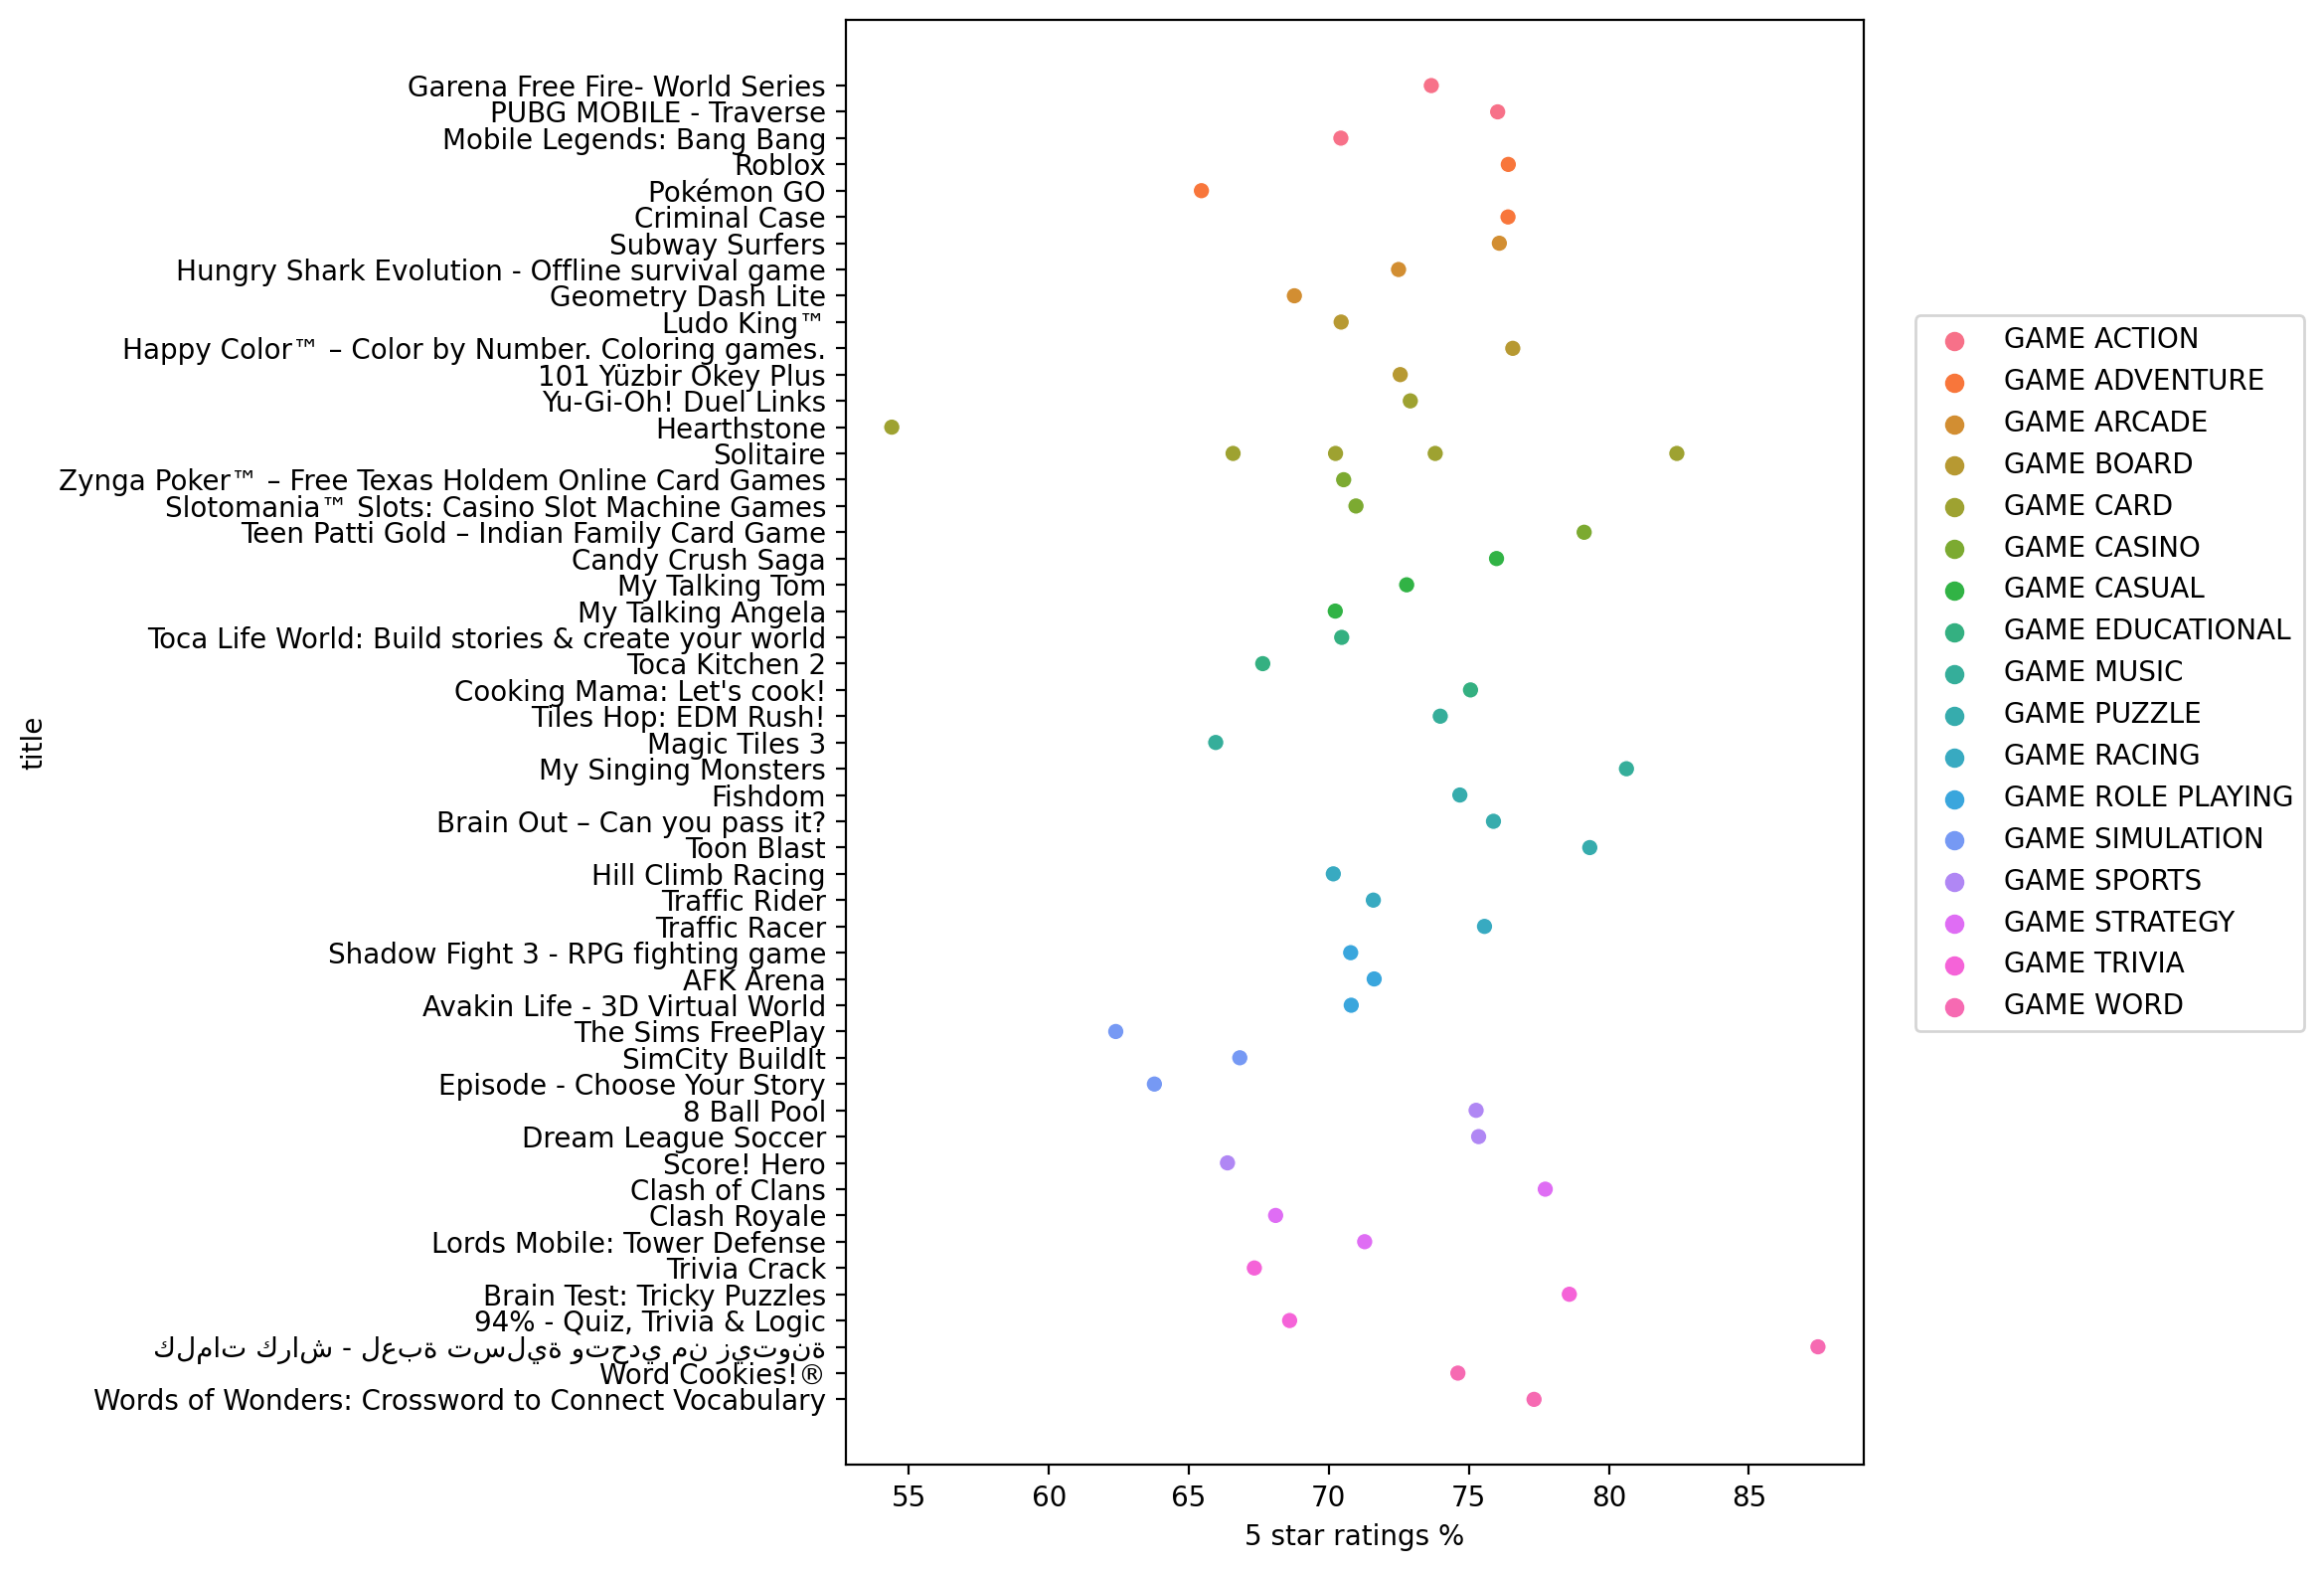

In [74]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=top_3,y="title",x="5 star ratings %", hue="category")
plt.legend(loc=(1.05,0.3))
plt.tight_layout();

- As mentioned above, games in the action, casual, strategy,arcade, sports categories are getting considerably more ratings than, games in the educational, music categories.
- It is the same even for the top ranked games in these categories.

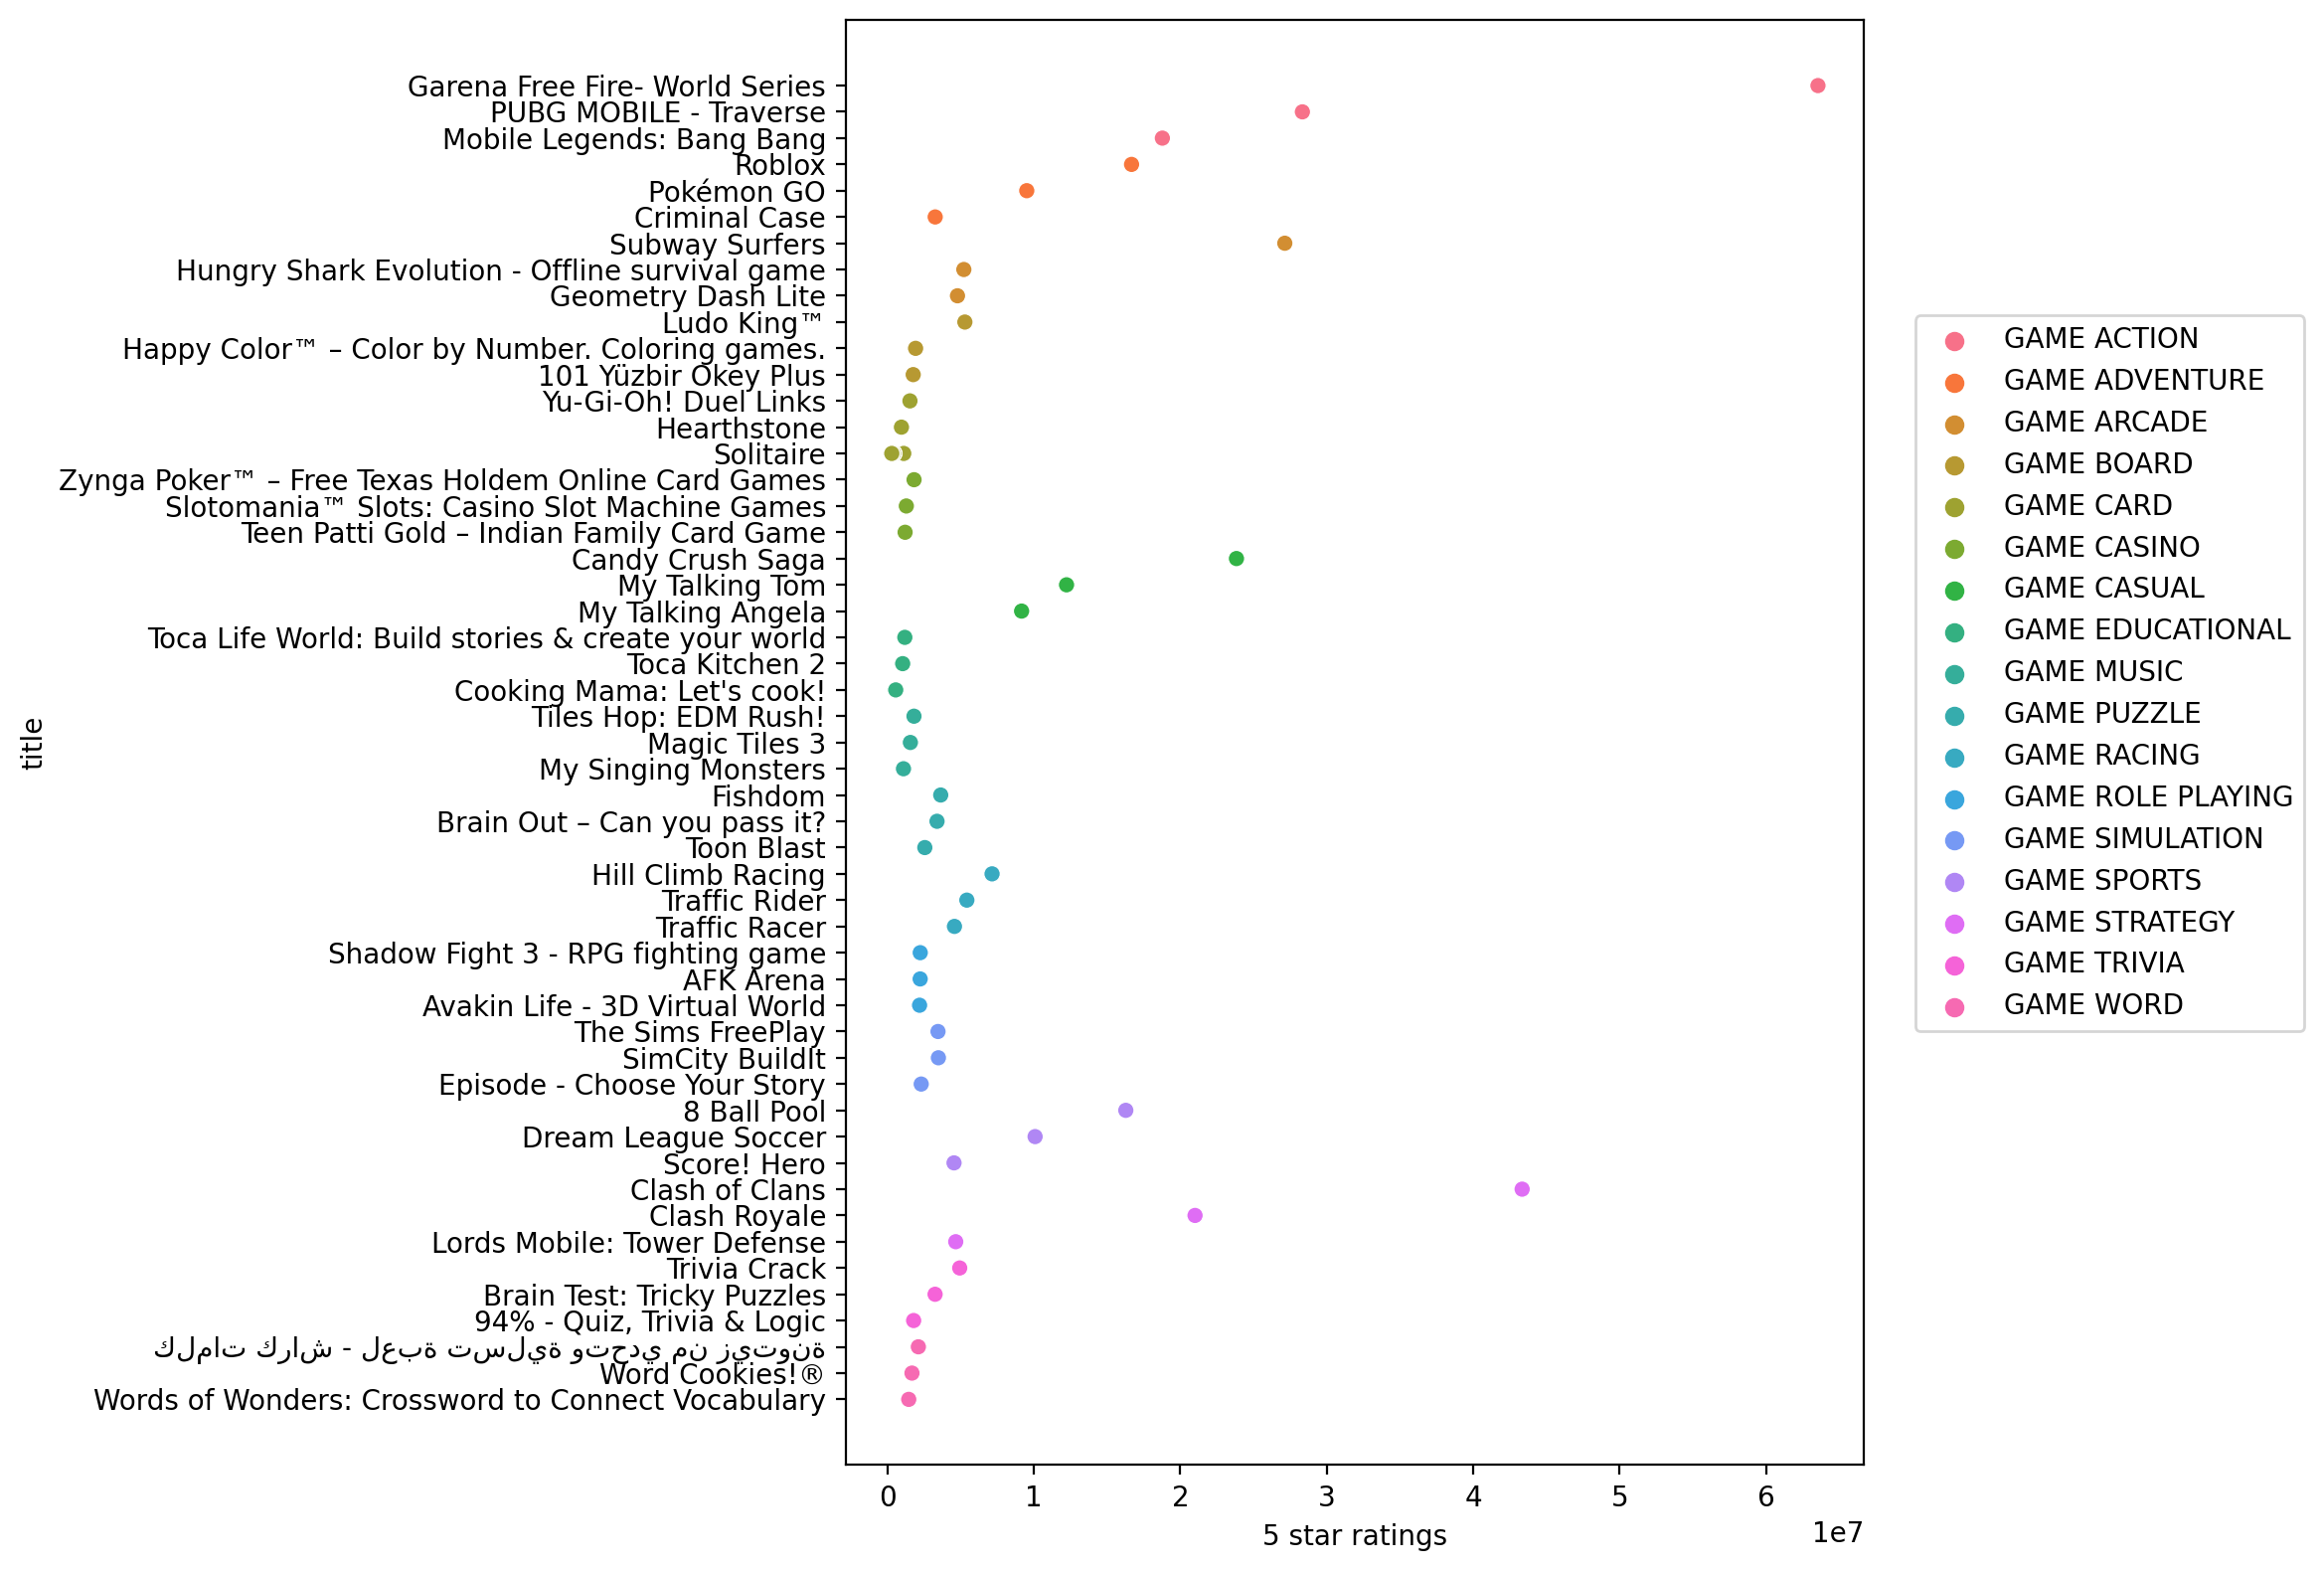

In [75]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=top_3,y="title",x="5 star ratings", hue="category")
plt.legend(loc=(1.05,0.3))
plt.tight_layout();

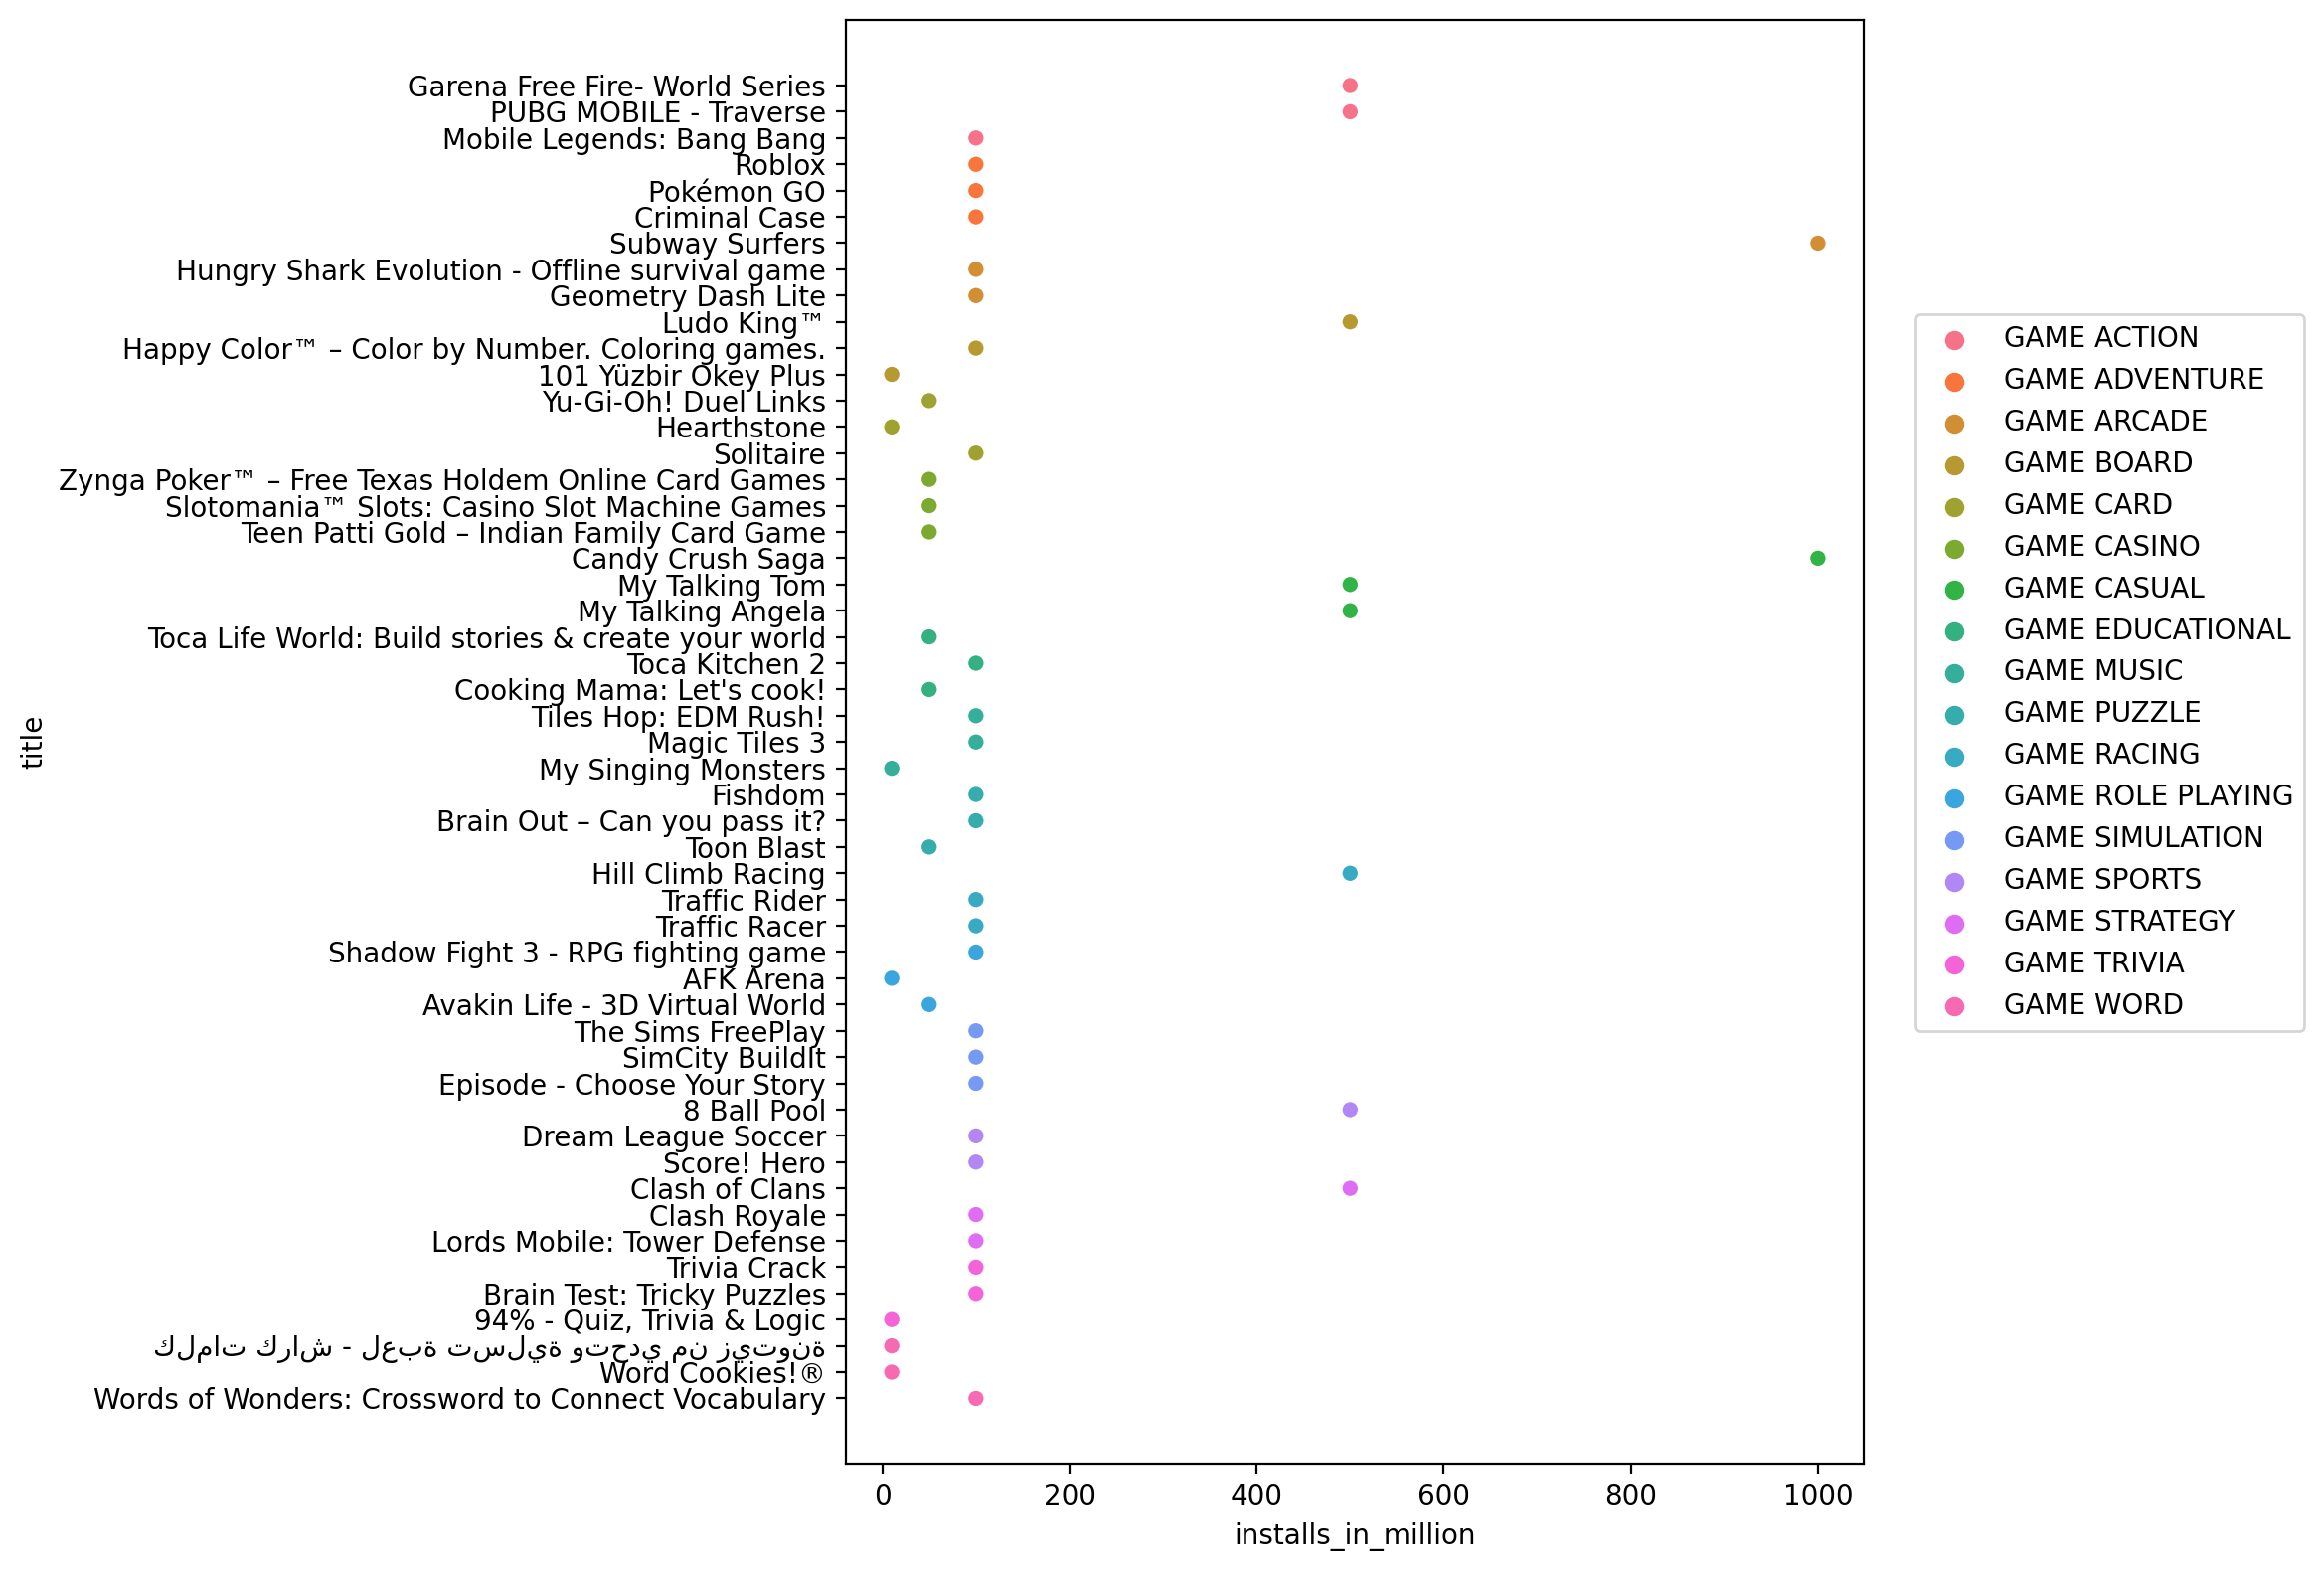

In [70]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=top_3,y="title",x="installs_in_million", hue="category")
plt.legend(loc=(1.05,0.3))
plt.tight_layout();

- As mentioned above, games in the action, arcade and casual categories are installed significantly more than games in the trivia, casino and word categories.
- It is the same even for the top ranked games in these categories.

It was a pleasure to work with this dataset for me. I would like to thank dataset contibutor for this data. I hope you enjoyed too. If you liked my EDA on this dataset, feel free to check my other notebooks as well. Looking forward for your feedback. Thanks a lot.

Have a great day.